Matplotlib

## 关联
1. 散点图(Scatter plot)
2. 带边界的气泡图(Bubble plot with Encircling)
3. 带线性回归最佳拟合线的散点图(Scatter plot with line of best fit)
4. 抖动图(Jitterring with stripplot)
5. 计数图(Counts plot)
6. 边缘直方图(Marginal Histogram)
7. 边缘箱形图(Marginal Boxplot)
8. 相关图(Correlogram)
9. 矩阵图(Pairwise Plot)

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.1.1
print(sns.__version__)  #> 0.9.0

3.1.1
0.9.0


## 1. 散点图
- Scatteplot是用于研究两个变量之间关系的经典和基本图。如果数据中有多个组，则可能需要以不同颜色可视化每个组。在Matplotlib，你可以方便地使用。

In [2]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [3]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [4]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
midwest['category'].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
LAU      3
HAU      3
LHU      2
HLR      2
HHR      1
Name: category, dtype: int64

In [5]:
categories=np.unique(midwest['category'])

In [6]:
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

In [7]:
plt.cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [8]:
1/(len(categories)-1)

0.07692307692307693

In [9]:
plt.cm.tab10(0.07692307692307693)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

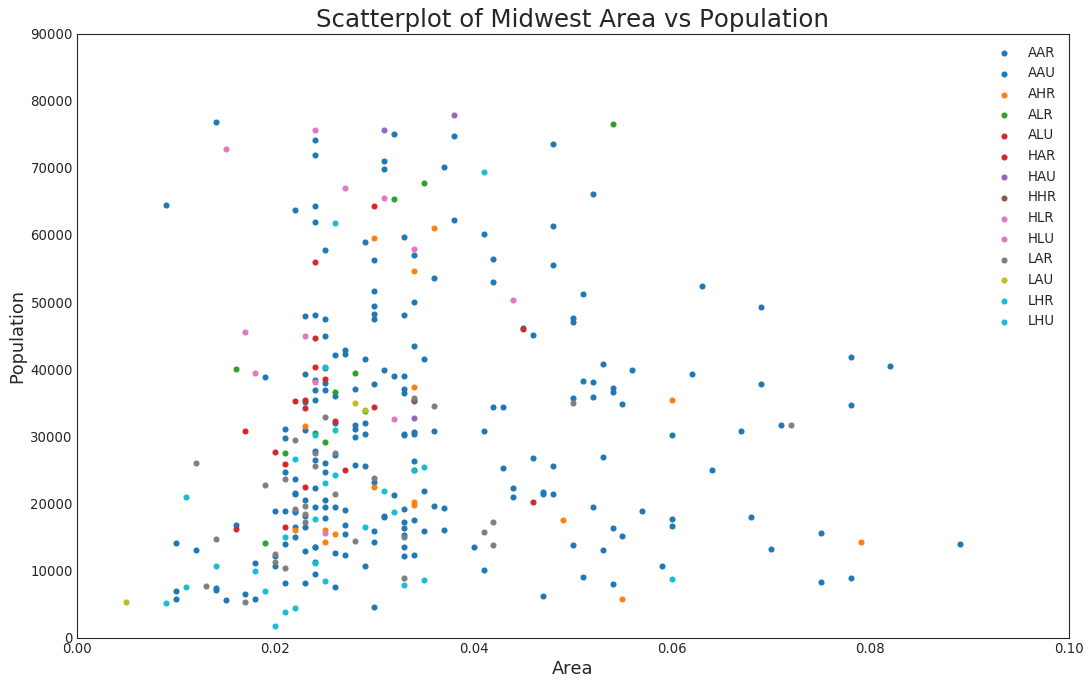

In [11]:
# Draw Plot for Each Category
plt.figure(figsize=(16,10),dpi=80,facecolor='w',edgecolor='k')

for i,category in enumerate(categories):
    plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category==category,:],
               s=20,c=colors[i],label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()   

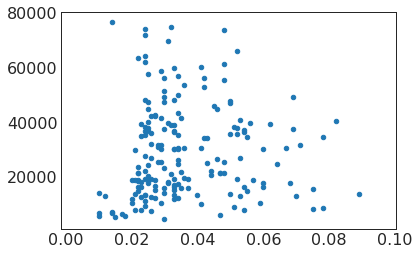

In [12]:
plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category=='AAR',:],
               s=20,label='AAR')

## 2. 带边界的气泡图
- 有时，您希望在边界内显示一组点以强调其重要性。在此示例中，您将从应该被环绕的数据帧中获取记录，并将其传递给下面的代码中描述的记录。encircle()

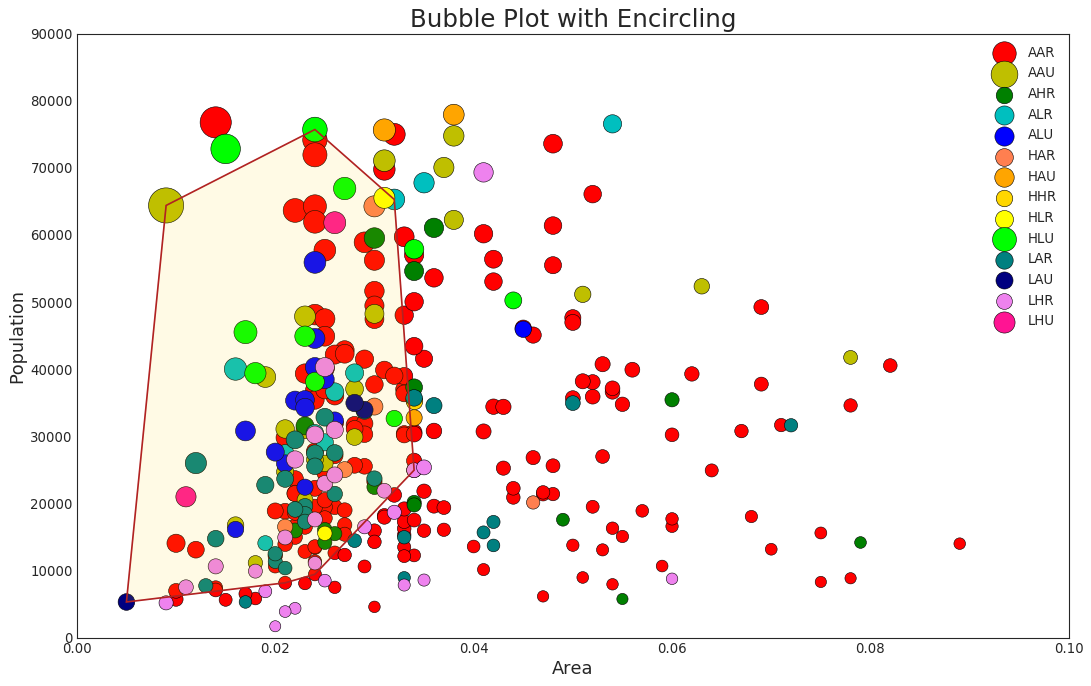

In [13]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
#colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
colors=['r','y','g','c','b','coral','orange','gold','yellow','lime','teal','navy','violet','deeppink','indigo','lightpink']

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k') 

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :] 

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

## 3. 带线性回归最佳拟合线的散点图
- 如果你想了解两个变量如何相互改变，那么最佳拟合线就是常用的方法。 下图显示了数据中各组之间最佳拟合线的差异。 要禁用分组并仅为整个数据集绘制一条最佳拟合线，请从下面的 sns.lmplot()调用中删除 hue ='cyl'参数。

In [14]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

In [15]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [16]:
df['cyl'].value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

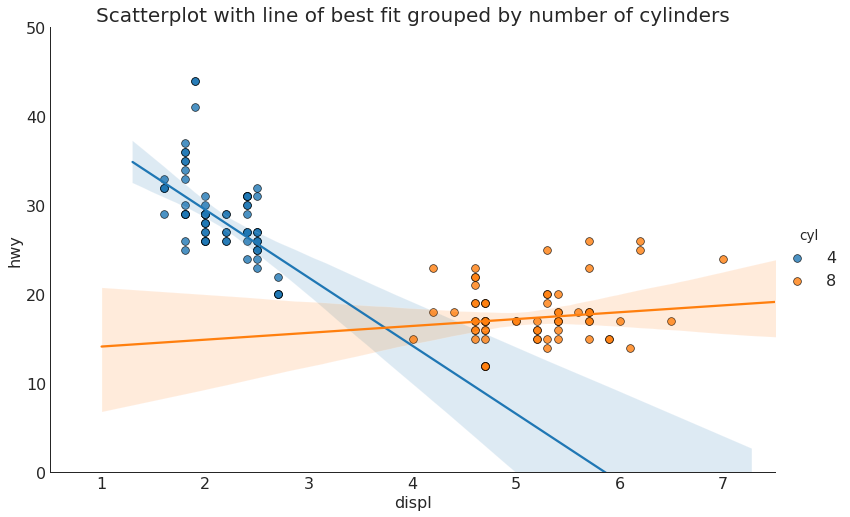

In [17]:
# Plot
sns.set_style("white")
gridobj=sns.lmplot(x='displ',y='hwy',hue='cyl',data=df_select,
                  height=7,aspect=1.6,robust=True,palette='tab10',
                  scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))
# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

- 针对每列绘制线性回归线：

- 或者，可以在其每列中显示每个组的最佳拟合线。 可以通过在 sns.lmplot() 中设置 col=groupingcolumn 参数来实现，如下：

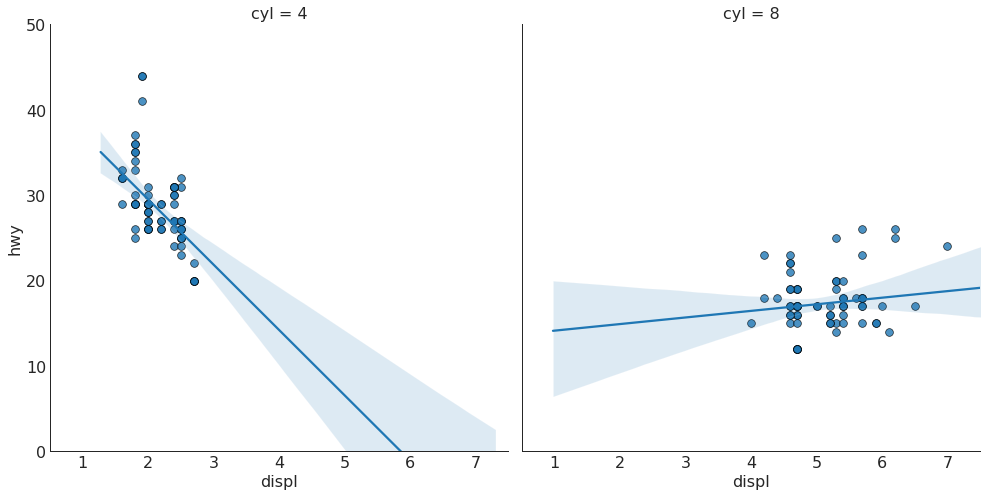

In [18]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

## 4. 抖动图 (Jittering with stripplot)
- 通常，多个数据点具有完全相同的 X 和 Y 值。 结果，多个点绘制会重叠并隐藏。 为避免这种情况，请将数据点稍微抖动，以便您可以直观地看到它们。 使用 seaborn 的 stripplot() 很方便实现这个功能。

In [19]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [20]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


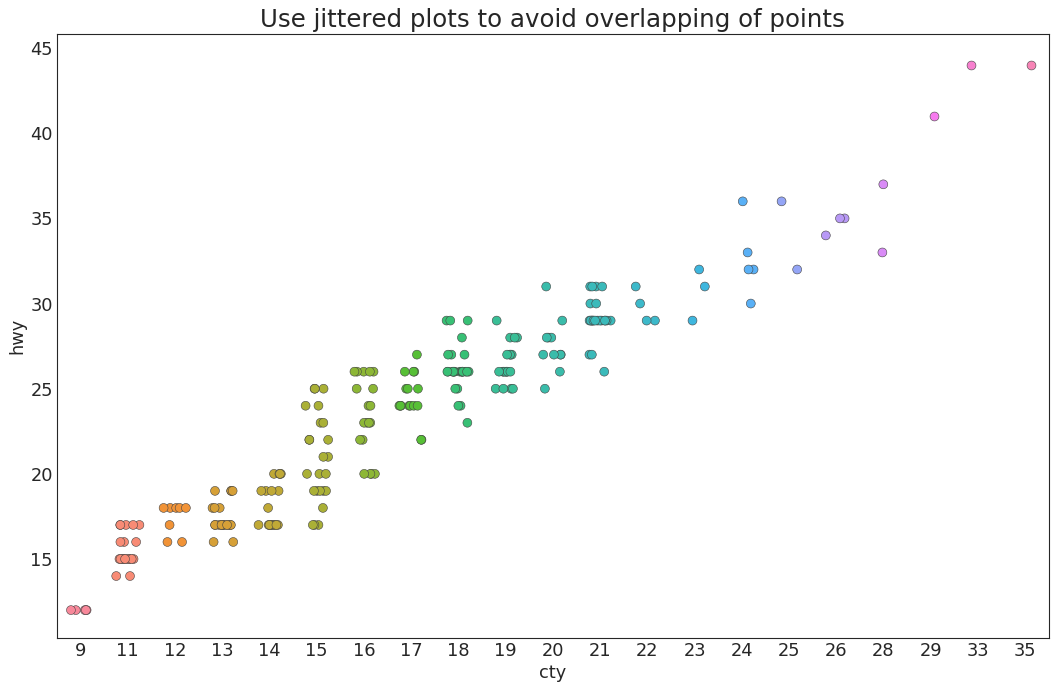

In [26]:
#Draw Stripplot
fig,ax=plt.subplots(figsize=(16,10),dpi=80)
sns.stripplot(df.cty,df.hwy,jitter=.25,size=8,ax=ax,linewidth=0.5)
# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

## 5. 计数图 (Counts Plot)
- 避免点重叠问题的另一个选择是增加点的大小，这取决于该点中有多少点。 因此，点的大小越大，其周围的点的集中度越高。

In [31]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

In [36]:
df.groupby(['cty','hwy']).size().reset_index(name='counts')

,cty,hwy,counts
0,9,12,5
1,11,14,2
2,11,15,10
3,11,16,3
4,11,17,5
...,...,...,...
73,28,33,1
74,28,37,1
75,29,41,1
76,33,44,1


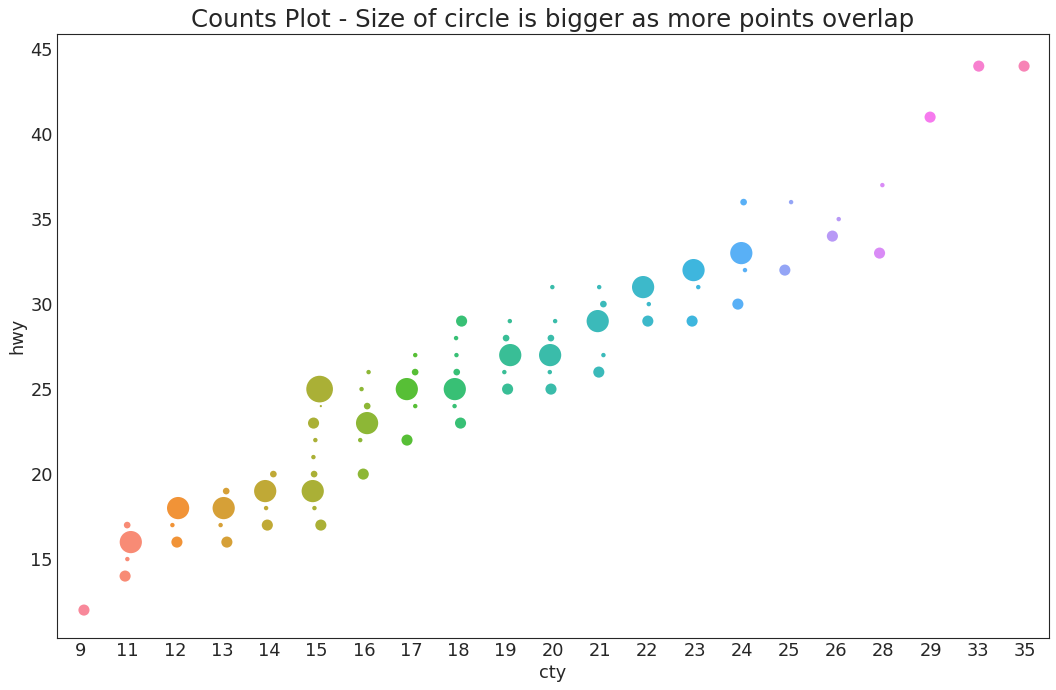

In [35]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)  
sns.stripplot(df_counts.cty,df_counts.hwy,size=df_counts.counts*2,ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

## 6. 边缘直方图 (Marginal Histogram)
- 边缘直方图具有沿 X 和 Y 轴变量的直方图。 这用于可视化 X 和 Y 之间的关系以及单独的 X 和 Y 的单变量分布。 这种图经常用于探索性数据分析(EDA)。

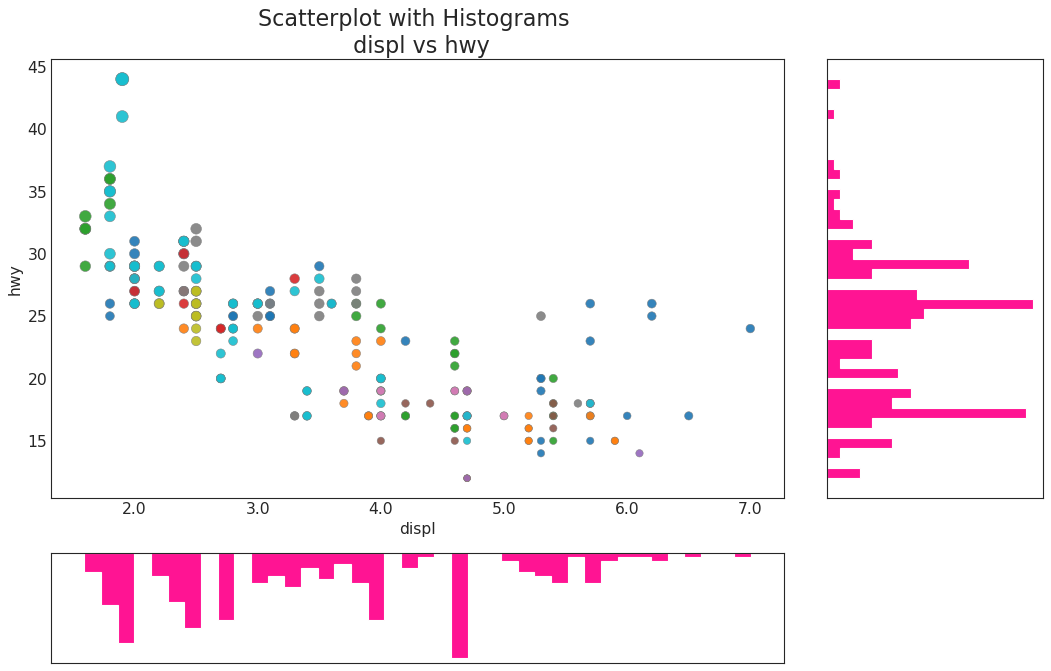

In [39]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

## 7. 边缘箱形图 (Marginal Boxplot)
- 边缘箱图与边缘直方图具有相似的用途。 然而，箱线图有助于精确定位 X 和 Y 的中位数、第25和第75百分位数。

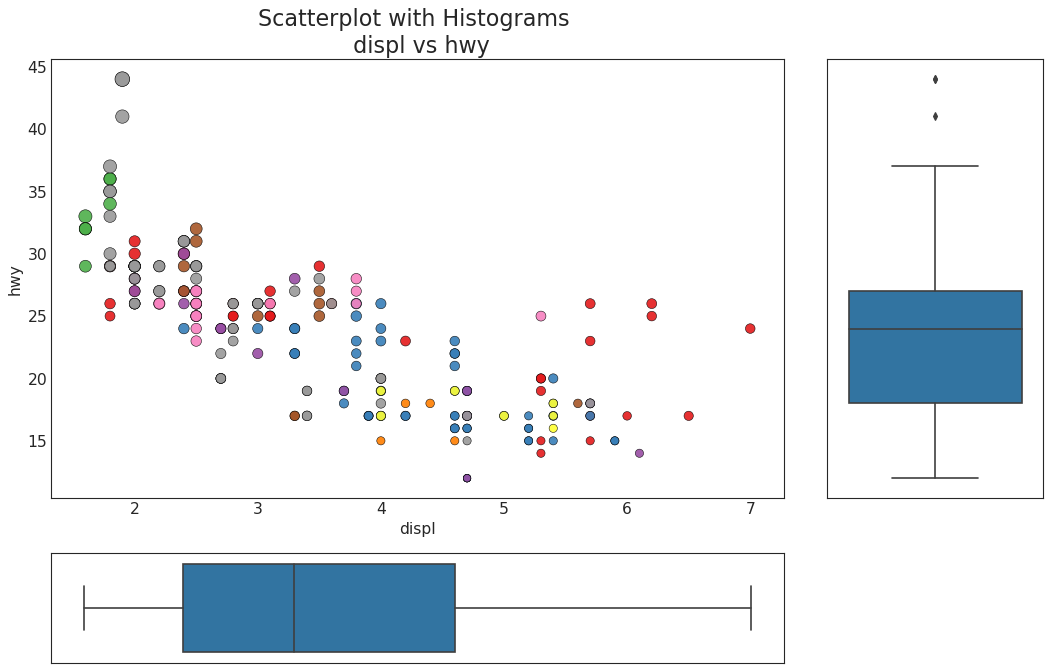

In [40]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

## 8. 相关图 (Correllogram)
- 相关图用于直观地查看给定数据框(或二维数组)中所有可能的数值变量对之间的相关度量。

In [41]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [42]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


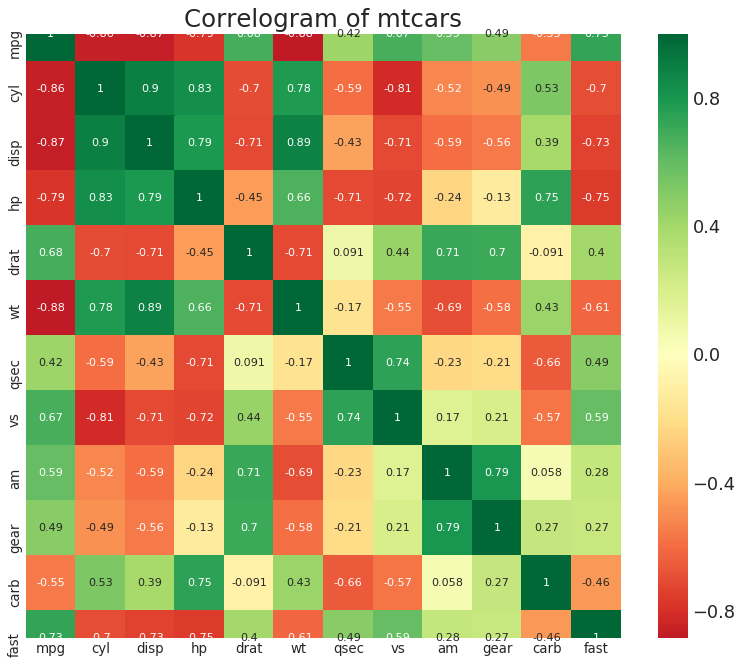

In [46]:
#plot
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,
           cmap='RdYlGn',center=0,annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 9. 矩阵图 (Pairwise Plot)
- 矩阵图是探索性分析中的最爱，用于理解所有可能的数值变量对之间的关系。 它是双变量分析的必备工具

In [47]:
# Load Dataset
df = sns.load_dataset('iris')

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 800x640 with 0 Axes>

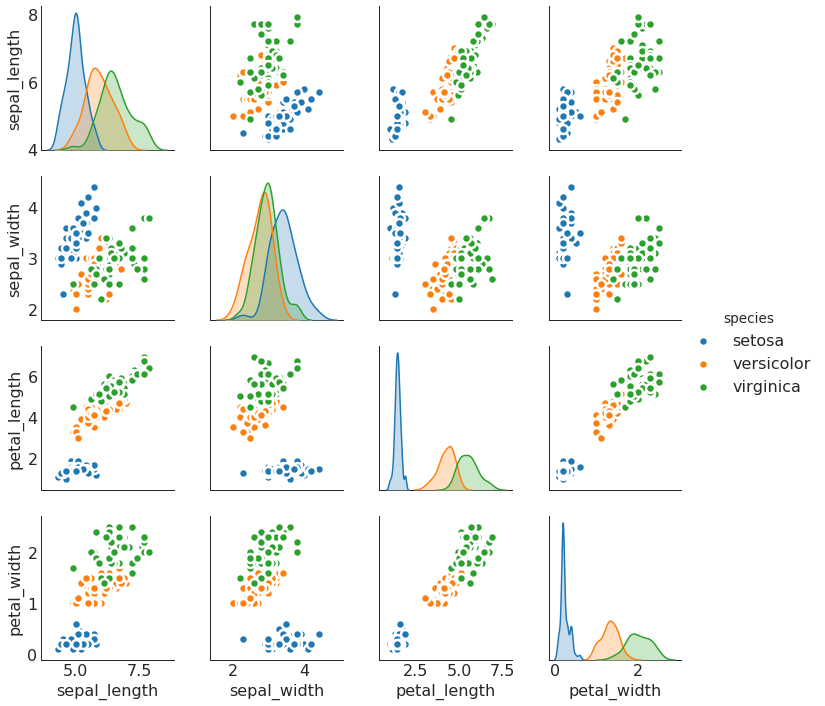

In [50]:
#Plot
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(df,kind='scatter',hue='species',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

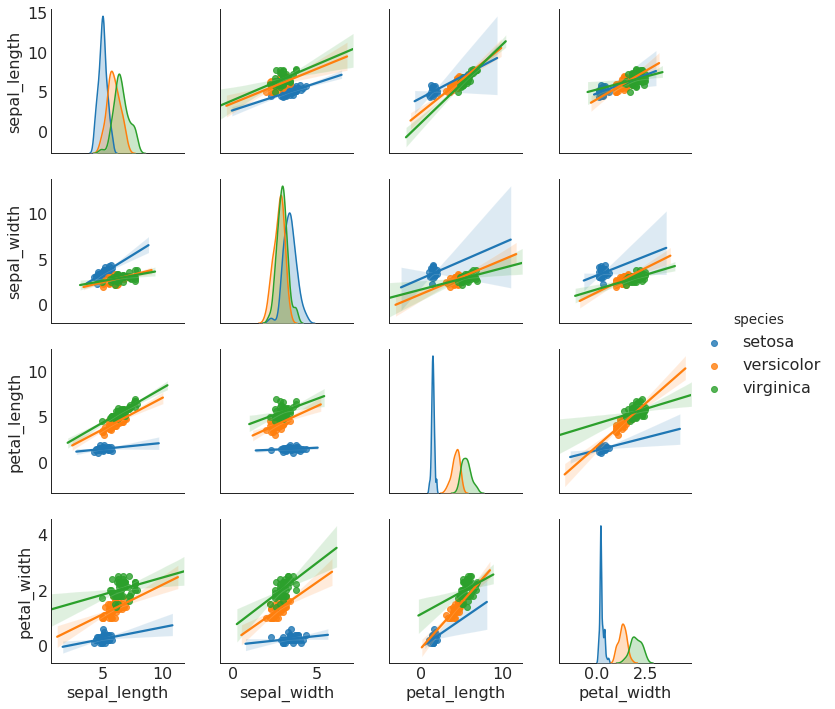

In [51]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()